# Digital Image Processing Project

### MTH Junaidi, AP17110010074, CSE B

This is the Project for CSE 314 - Digital Image Processing at SRM University, AP - Andhra Pradesh

The aim of this project is to classify the given new image of a conventional chest X - Ray into weather or not the lungs currosponding to the X Ray are infected with the pneonomia sue to coronavirus or not.

In [2]:
# Importing Libraries
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!ls

COVID-classifier.ipynb DataSet


In [4]:
PATH = 'DataSet'

In [5]:
os.path

<module 'posixpath' from '/Users/miranjunaidi/opt/anaconda3/envs/work/lib/python3.7/posixpath.py'>

In [6]:
num_cats_tr = len(os.listdir(PATH))

In [7]:
num_cats_tr

3

In [8]:
temp = os.path.join(PATH , 'Train')

In [9]:
temp

'DataSet/Train'

In [10]:
num_cats_tr = len(os.listdir(PATH))

In [11]:
num_cats_tr

3

In [12]:
temp = os.path.join(temp , 'Train')

In [13]:
temp

'DataSet/Train/Train'

In [14]:
num_cats_tr = len(os.listdir(PATH))

In [15]:
num_cats_tr

3

In [16]:
path_to_zip = tf.keras.utils.get_file?

Signature:
tf.keras.utils.get_file(
    fname,
    origin,
    untar=False,
    md5_hash=None,
    file_hash=None,
    cache_subdir='datasets',
    hash_algorithm='auto',
    extract=False,
    archive_format='auto',
    cache_dir=None,
)
Docstring:
Downloads a file from a URL if it not already in the cache.

By default the file at the url `origin` is downloaded to the
cache_dir `~/.keras`, placed in the cache_subdir `datasets`,
and given the filename `fname`. The final location of a file
`example.txt` would therefore be `~/.keras/datasets/example.txt`.

Files in tar, tar.gz, tar.bz, and zip formats can also be extracted.
Passing a hash will verify the file after download. The command line
programs `shasum` and `sha256sum` can compute the hash.

Arguments:
    fname: Name of the file. If an absolute path `/path/to/file.txt` is
        specified the file will be saved at that location.
    origin: Original URL of the file.
    untar: Deprecated in favor of 'extract'.
        boolean, wh

In [ ]:
path_to_zip = tf.keras.utils.get_file

In [17]:
path_to_zip = tf.keras.utils.get_file

In [18]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [19]:
PATH

'/Users/miranjunaidi/.keras/datasets/cats_and_dogs_filtered'

In [29]:
PATH = "/Users/miranjunaidi/Documents/6thSem/DIP/DIP_Project/MyProject"

In [30]:
PATH = os.path.join(PATH , 'DataSet')

In [31]:
num_cats_tr = len(os.listdir(PATH))

In [32]:
num_cats_tr

3

In [33]:
PATH

'/Users/miranjunaidi/Documents/6thSem/DIP/DIP_Project/MyProject/DataSet'

In [34]:
PATH = os.path.join(PATH , 'Train')

In [39]:
temp = os.listdir(PATH)

In [40]:
temp

['.DS_Store', 'NON-COVID', 'COVID']

In [41]:
PATH = os.path.join(PATH , 'NON-COVID')

In [42]:
num_cats_tr = len(os.listdir(PATH))

In [43]:
num_cats_tr

150

In [44]:
PATH = "/Users/miranjunaidi/Documents/6thSem/DIP/DIP_Project/MyProject"

In [45]:
PATH = os.path.join(PATH , 'DataSet')

In [46]:
os.listdir(PATH)

['.DS_Store', 'Train', 'Test ']

#### Figured the Path and structured the directories. PATH is the path to the Dataset

In [48]:
train_dir = os.path.join(PATH, 'Train')
test_dir = os.path.join(PATH, 'Test')

In [64]:
train_covid_dir = os.path.join(train_dir, 'COVID')  # directory with our training Covid
train_non_covid_dir = os.path.join(train_dir, 'NON-COVID')  # directory with our training Non covid
test_covid_dir = os.path.join(test_dir, 'Covid')  # directory with our test Coid
test_noncovid_dir = os.path.join(test_dir, 'NONCovid')  # directory with our test for non-covid

In [65]:
num_covid_images = len(os.listdir(train_covid_dir))
num_non_covid_images = len(os.listdir(train_non_covid_dir))

In [66]:
num_covid_images

150

In [67]:
num_non_covid_images

150

In [72]:
num_covid_test = len(os.listdir(test_covid_dir))
num_noncovid_test = len(os.listdir(test_noncovid_dir))

In [69]:
num_covid_test

50

In [73]:
num_noncovid_test

50

In [74]:
os.listdir(test_noncovid_dir)

['NORMAL2-IM-0102-0001.jpeg',
 'NORMAL2-IM-0027-0001.jpeg',
 'NORMAL2-IM-0033-0001.jpeg',
 'NORMAL2-IM-0012-0001.jpeg',
 'NORMAL2-IM-0019-0001.jpeg',
 'IM-0084-0001.jpeg',
 'IM-0089-0001.jpeg',
 'NORMAL2-IM-0092-0001.jpeg',
 'NORMAL2-IM-0086-0001.jpeg',
 'NORMAL2-IM-0035-0001.jpeg',
 'IM-0097-0001.jpeg',
 'NORMAL2-IM-0045-0001.jpeg',
 'NORMAL2-IM-0051-0001.jpeg',
 'NORMAL2-IM-0098-0001.jpeg',
 'IM-0083-0001.jpeg',
 'NORMAL2-IM-0081-0001.jpeg',
 'IM-0101-0001.jpeg',
 'NORMAL2-IM-0095-0001.jpeg',
 'NORMAL2-IM-0007-0001.jpeg',
 'NORMAL2-IM-0013-0001.jpeg',
 'IM-0091-0001.jpeg',
 'NORMAL2-IM-0105-0001.jpeg',
 'IM-0085-0001.jpeg',
 'IM-0107-0001.jpeg',
 'NORMAL2-IM-0073-0001.jpeg',
 'NORMAL2-IM-0052-0001.jpeg',
 'NORMAL2-IM-0028-0001.jpeg',
 'NORMAL2-IM-0096-0001.jpeg',
 'IM-0102-0001.jpeg',
 'IM-0099-0001.jpeg',
 'IM-0086-0001.jpeg',
 'IM-0109-0001.jpeg',
 'NORMAL2-IM-0023-0001.jpeg',
 'NORMAL2-IM-0059-0001.jpeg',
 'IM-0110-0001.jpeg',
 'NORMAL2-IM-0072-0001.jpeg',
 'NORMAL2-IM-0066-0001.j

In [75]:
total_train = num_covid_images + num_non_covid_images
total_test = num_covid_test + num_noncovid_test

In [76]:
print('total training Covid images:', num_covid_images)
print('total training Non-Covid images:', num_non_covid_images)

print('total Testing Covid images:', num_covid_test)
print('total Testing Non-Covid images:', num_noncovid_test)
print("--")
print("Total training images:", total_train)
print("Total Testing images:", total_test)

total training Covid images: 150
total training Non-Covid images: 150
total Testing Covid images: 50
total Testing Non-Covid images: 50
--
Total training images: 300
Total Testing images: 100


In [92]:
batch_size = 10
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [93]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [94]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 300 images belonging to 2 classes.


In [95]:
test_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 100 images belonging to 2 classes.


In [96]:
sample_training_images, _ = next(train_data_gen)

In [97]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

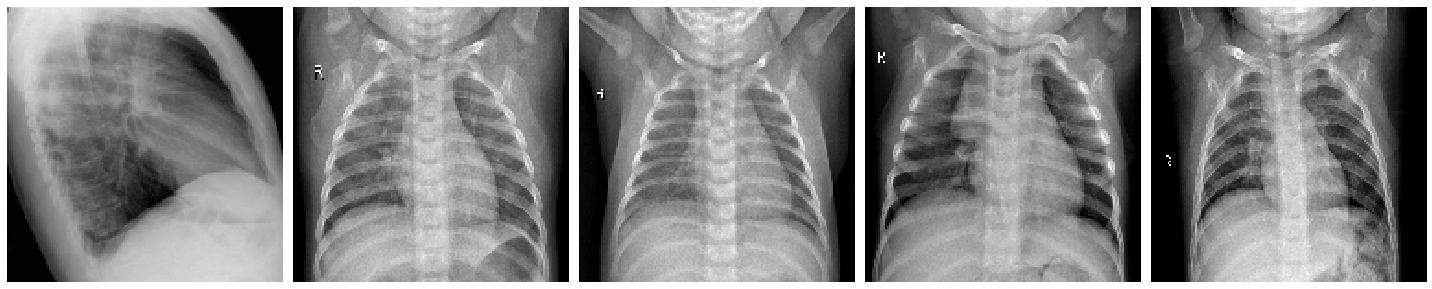

In [98]:
plotImages(sample_training_images[:5])

In [99]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [100]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [102]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size
)

Epoch 1/15
30/30 [==============================] - 25s 847ms/step - loss: 0.4677 - acc: 0.7367 - val_loss: 0.1251 - val_acc: 0.9700
Epoch 2/15
30/30 [==============================] - 25s 844ms/step - loss: 0.1666 - acc: 0.9633 - val_loss: 0.9109 - val_acc: 0.7100
Epoch 3/15
30/30 [==============================] - 26s 871ms/step - loss: 0.0679 - acc: 0.9733 - val_loss: 0.0831 - val_acc: 0.9500
Epoch 4/15
30/30 [==============================] - 20s 652ms/step - loss: 0.0505 - acc: 0.9833 - val_loss: 0.3622 - val_acc: 0.8200
Epoch 5/15
30/30 [==============================] - 20s 661ms/step - loss: 0.0099 - acc: 0.9933 - val_loss: 0.2033 - val_acc: 0.9200
Epoch 6/15
30/30 [==============================] - 22s 723ms/step - loss: 7.7713e-04 - acc: 1.0000 - val_loss: 0.1168 - val_acc: 0.9300
Epoch 7/15
30/30 [==============================] - 19s 633ms/step - loss: 5.0357e-04 - acc: 1.0000 - val_loss: 0.2440 - val_acc: 0.9200
Epoch 8/15
30/30 [==============================] - 18s 607ms

In [107]:
history.history

{'loss': [0.46765277137358985,
  0.16659826613031328,
  0.06789930345645795,
  0.05054639279042021,
  0.009926372185448902,
  0.0007771310181321193,
  0.0005035689053158876,
  0.00016647607425426258,
  8.232782930311563e-05,
  4.330988141039901e-05,
  3.36725873769872e-05,
  2.807432358788257e-05,
  2.5442967909938828e-05,
  2.156381653080075e-05,
  1.946665426977671e-05],
 'acc': [0.7366667,
  0.9633333,
  0.97333336,
  0.98333335,
  0.99333334,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.12507312661036848,
  0.9109101890120656,
  0.08314864123240114,
  0.36220331299118697,
  0.20333826141431927,
  0.11682728130326722,
  0.24400449512831984,
  0.17857444066576136,
  0.25586579729679215,
  0.24849737929471302,
  0.2520318753194715,
  0.2519814725412289,
  0.26563949900096306,
  0.25817560504474385,
  0.25124409367272166],
 'val_acc': [0.97,
  0.71,
  0.95,
  0.82,
  0.92,
  0.93,
  0.92,
  0.91,
  0.92,
  0.92,
  0.92,
  0.92,
  0.92,
  0.92,


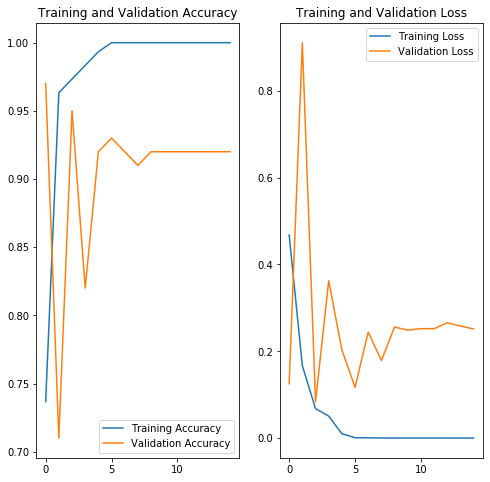

In [109]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.

In [120]:
sample_testing_images, _ = next(test_data_gen)

In [121]:
sample_testing_images.shape 

(10, 150, 150, 3)

In [138]:
a = sample_testing_images[:1]

### We can infer from the above graph that the model is trained to perfection and there is no overfitting and great increment in accuracy and reduction in the loss

In [139]:
a.shape

(1, 150, 150, 3)

In [140]:
model.predict_proba(a)

array([[28.28252]], dtype=float32)

In [126]:
model.save_weights('covidcllassify.h5')

# Making another Model

In [141]:
model2 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='softmax'),
    Dense(1)
])

In [142]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [143]:
history2 = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size
)

Epoch 1/15
30/30 [==============================] - 23s 768ms/step - loss: 1.7677e-05 - acc: 1.0000 - val_loss: 0.2583 - val_acc: 0.9200
Epoch 2/15
30/30 [==============================] - 22s 731ms/step - loss: 1.6768e-05 - acc: 1.0000 - val_loss: 0.2577 - val_acc: 0.9200
Epoch 3/15
30/30 [==============================] - 23s 779ms/step - loss: 1.4852e-05 - acc: 1.0000 - val_loss: 0.2573 - val_acc: 0.9200
Epoch 4/15
30/30 [==============================] - 21s 704ms/step - loss: 1.3995e-05 - acc: 1.0000 - val_loss: 0.2552 - val_acc: 0.9200
Epoch 5/15
30/30 [==============================] - 21s 684ms/step - loss: 1.2938e-05 - acc: 1.0000 - val_loss: 0.2656 - val_acc: 0.9200
Epoch 6/15
30/30 [==============================] - 20s 655ms/step - loss: 1.1405e-05 - acc: 1.0000 - val_loss: 0.2607 - val_acc: 0.9200
Epoch 7/15
30/30 [==============================] - 20s 681ms/step - loss: 1.0731e-05 - acc: 1.0000 - val_loss: 0.2644 - val_acc: 0.9200
Epoch 8/15
30/30 [=======================

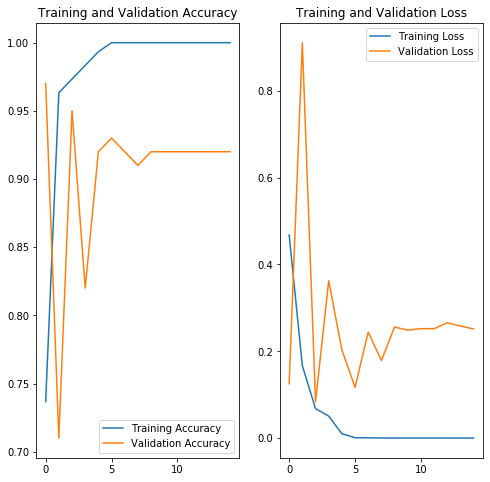

In [144]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [145]:
model.predict_proba(a)

array([[30.621798]], dtype=float32)

### No Significant improvement with changing the last layer activiation function

SO we have now built a complete  model which is capable of prediciting weather a given chest X Ray has coronavirus or not. 